# Introduction to Using Jupyter Notebooks
Welcome to this Jupyter Notebook! Jupyter Notebooks are an interactive way to write and execute code, document your work, and visualize data, all within a single interface. 

## Key Features of Jupyter Notebooks 

### Cells
The notebook is composed of cells. There are two main types of cells:

Code Cells: These cells contain code that you can execute.  
Markdown Cells: These cells contain text written in Markdown, a lightweight markup language with plain-text formatting syntax. You can use Markdown to add headings, lists, links, and more.  

### Execution
To run a code cell, click on the cell to select it and press Shift + Enter or click the Run button in the toolbar. The output will be displayed directly below the cell. Markdown cells can also be rendered by selecting the cell and pressing Shift + Enter.

### Kernel
The kernel is the computational engine that executes the code contained in the notebook. You can restart or change the kernel from the menu if needed (e.g., if the kernel becomes unresponsive or if you want to switch programming languages).


## Examples of a cell you can run

When you run the code cell below, you should see the output 



In [ ]:
# This is a code cell
print("Hello, Jupyter!")

## Generating a random number 

Earlier we showed the Excel function =NORMINV(RAND(),0,1) in Python using a Jupyter Notebook. This function generates a random number from a normal distribution with a mean of 0 and a standard deviation of 1. Now we'll show the same thing in Python. 

Python is very flexible language which has sub-modules (known as libraries) for many different tasks. Here we load one called numpy

In [2]:
# Load libraries
import numpy as np


In Excel, RAND() generates a random number between 0 and 1. We'll do the same using numpy.

In [3]:
# Generate a random number between 0 and 1
uniform_random_number = np.random.rand()
uniform_random_number

0.30757170077387597

## Converting the random number into a normal distribution 

The Excel function NORMINV(RAND(), 0, 1) is used to convert the uniformly distributed random number to a normally distributed random number with a mean of 0 and a standard deviation of 1. We can achieve this using scipy.stats.norm.ppf (percent point function, the inverse of the cumulative distribution function).

In [4]:

# Define mean and standard deviation
mean = 0
std_dev = 1

# Convert the uniform random number to a normal distribution
normal_random_number = np.random.normal(loc=mean, scale=std_dev)
normal_random_number

-0.4236302377986481

## Generate 100 random numbers from the normal distribution

Here we generate 100 random numbers from a normal distribution with a mean of 0 and a standard deviation of 1, and then save them to an array.

In [16]:
size_of_array = 100

# Generate 100 random numbers from a normal distribution with mean 0 and standard deviation 1
normal_random_array = np.random.normal(loc=mean, scale=std_dev, size=size_of_array)

# Show the array
normal_random_array

array([-0.41483879, -1.40392534, -0.49502131,  0.26423469,  1.42331375,
        0.42225141,  0.03886205,  0.17212831,  1.58592017,  0.57418828,
       -0.28703958,  0.96451165,  0.89700918,  0.1370823 , -0.23354356,
        0.69592722, -0.67646531, -0.37061097, -0.03286704, -0.22093328,
        0.53428368,  0.0184665 , -1.92442757,  2.12951155, -2.5710478 ,
       -0.4501938 , -1.8374932 ,  1.77252074,  1.06358929,  0.13613379,
       -1.03711726,  0.70634636, -1.13982783,  1.13197148,  0.73648341,
        0.94259447,  1.33509625, -0.72660721,  0.74710768, -0.10054758,
        1.34876599, -1.17463757,  2.02381263,  0.01985355,  0.42890507,
        0.21272753,  0.30781088, -0.19425604, -0.55078054,  1.24083773,
       -0.38593053,  0.20661682, -0.62593988, -1.37431454,  1.07984321,
       -0.95642897, -0.49148916,  1.26843471,  0.04897606, -1.96431875,
       -0.03020805, -1.27487531,  0.11171658,  1.56913998, -0.40541936,
        0.45069838,  1.94714872, -0.65136972,  1.69973793, -0.63

## Plot the normal distribution using the array we created above

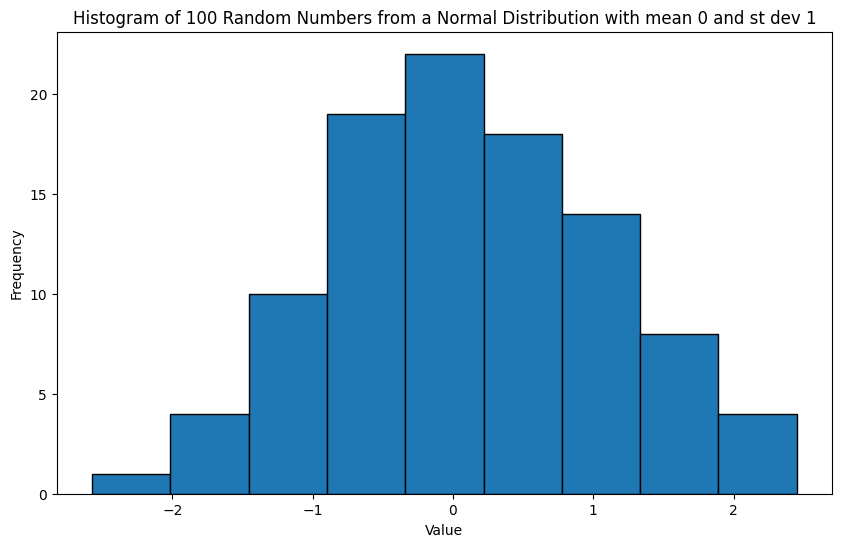

In [18]:
import matplotlib.pyplot as plt


# Plot the array as a histogram
plt.figure(figsize=(10, 6))
plt.hist(normal_random_array, bins=9, edgecolor='black')
plt.title('Histogram of '+ str(size_of_array) + ' Random Numbers from a Normal Distribution with mean ' + str(mean) + ' and st dev ' + str(std_dev))
plt.xlabel('Value')
plt.ylabel('Frequency')
# plt.grid(True)
plt.show()

## Plot an exponential distribution

We'll assume that the mean length of stay is 5 hours, and the distribution is exponential

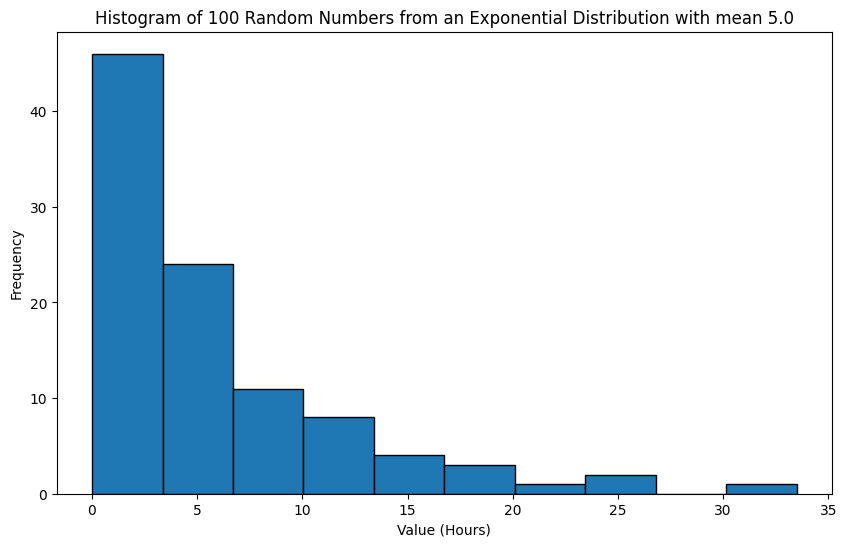

In [19]:
# Mean of the exponential distribution (average patient length of stay in hours)
M = 5.0  # for example, 5 hours

# Generate 100 random numbers from an exponential distribution with mean M
exponential_random_array = np.random.exponential(M, size=size_of_array)

# Plot the array as a histogram
plt.figure(figsize=(10, 6))
plt.hist(exponential_random_array, bins=10, edgecolor='black')
plt.title('Histogram of '+ str(size_of_array) + ' Random Numbers from an Exponential Distribution with mean ' + str(M))
plt.xlabel('Value (Hours)')
plt.ylabel('Frequency')
plt.show()

## Plot a Poisson distribution

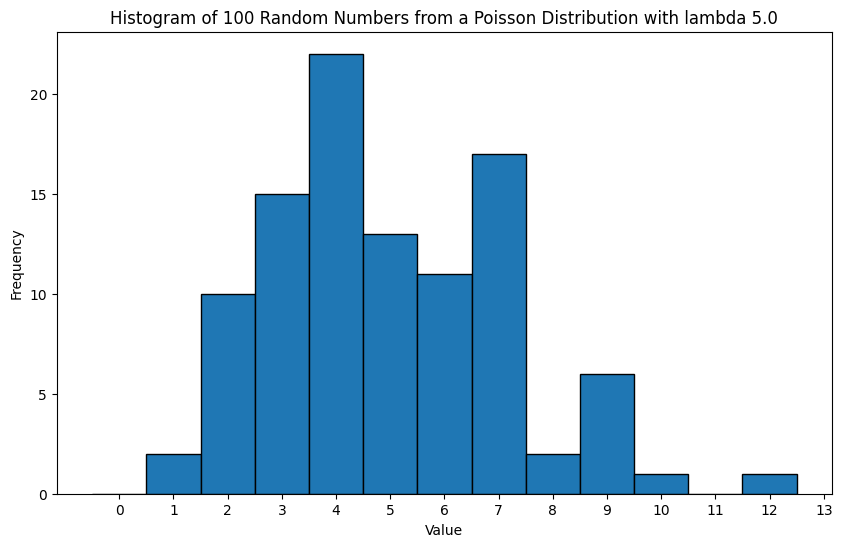

In [22]:
# Parameter for the Poisson distribution (average number of events in an interval)
lambda_param = 5.0  # for example, 5 arrivals per hour

# Generate 100 random numbers from a Poisson distribution with parameter lambda_param
poisson_random_array = np.random.poisson(lambda_param, size=size_of_array)

# Plot the array as a histogram
plt.figure(figsize=(10, 6))
plt.hist(poisson_random_array, bins=range(0, max(poisson_random_array) + 1), edgecolor='black', align='left')
plt.title('Histogram of '+ str(size_of_array) + ' Random Numbers from a Poisson Distribution with lambda ' + str(lambda_param))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(range(0, max(poisson_random_array) + 1))  # To display integer ticks
plt.show()

## Plot a Lognormal Distribution

A bit more complex for the lognormal, if used instead of Exponential for length of need.

Let’s suppose we have data about patient length of need showing a sample mean M and a sample standard deviation S. If we think these data follow a Lognormal distribution, it means that their logarithm follows a Normal distribution. The function in numpy takes the mean (MU) and standard deviation (SIGMA) of this underlying Normal distribution, so we need to do a transformation before applying it.

 

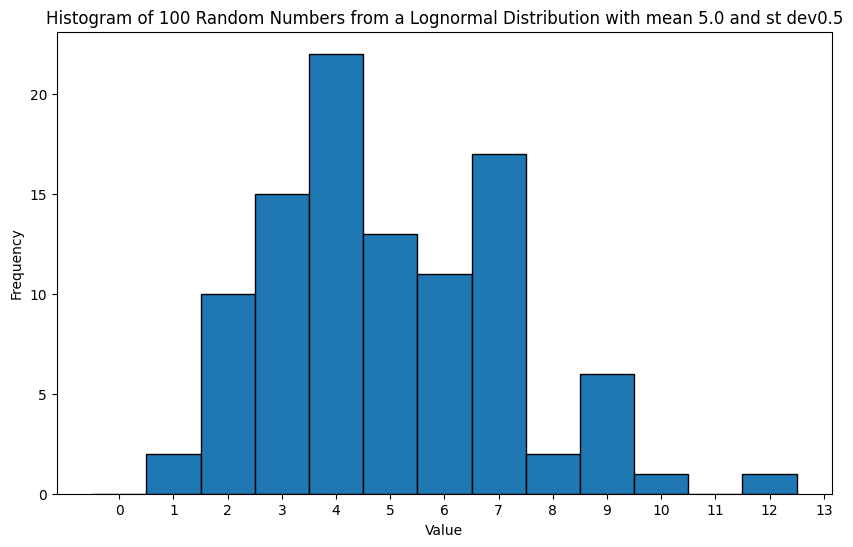

In [25]:
import math

# in the model we have 
M = 5.0 # M, the mean, ranges from 0.5 to 6 in the model
S = 0.1 * M # here we derive S from M
MU = math.log(M /math.sqrt(1+S**2/M **2)) # transformation needed for the input to the numpy random.lognormal function
SIGMA = math.sqrt(math.log(1+S**2/M**2)) # transformation needed for the input to the numpy random.lognormal function

serv_time = np.random.lognormal( MU, SIGMA,  size=size_of_array )

# Plot the array as a histogram
plt.figure(figsize=(10, 6))
plt.hist(poisson_random_array, bins=range(0, max(poisson_random_array) + 1), edgecolor='black', align='left')
plt.title('Histogram of '+ str(size_of_array) + ' Random Numbers from a Lognormal Distribution with mean ' + str(M) + ' and st dev' + str(S))
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks(range(0, max(poisson_random_array) + 1))  # To display integer ticks
plt.show()
